In [2]:
# Imports 
import os
import sys
sys.path.append("..")
os.environ["pyna_language"] = 'python'
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
%matplotlib inline
from pyNA.pyna import pyna
from scipy.interpolate import RegularGridInterpolator

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# Inputs 
z_cb_lst = np.hstack((np.linspace(25, 250, 10), np.linspace(300, 750, 10)))

TS_cb_lst = dict()
TS_cb_lst['stca']= dict()
TS_cb_lst['stca']['V2'] = np.linspace(0.75, 1.0, 11)
TS_cb_lst['stca']['Vmax'] = np.linspace(0.4, 1.0, 25)
TS_cb_lst['a10'] = dict()
TS_cb_lst['a10']['V2'] = np.linspace(0.775, 1.0, 10)
TS_cb_lst['a10']['Vmax'] = np.linspace(0.675, 1.0, 14)

Vmax_lst = dict()
Vmax_lst['stca'] = dict()
Vmax_lst['stca']['V2'] = 197*0.51444444
Vmax_lst['stca']['Vmax'] = 250*0.51444444
Vmax_lst['a10'] = dict()
Vmax_lst['a10']['V2'] = 234.4*0.51444444
Vmax_lst['a10']['Vmax'] = 250*0.51444444

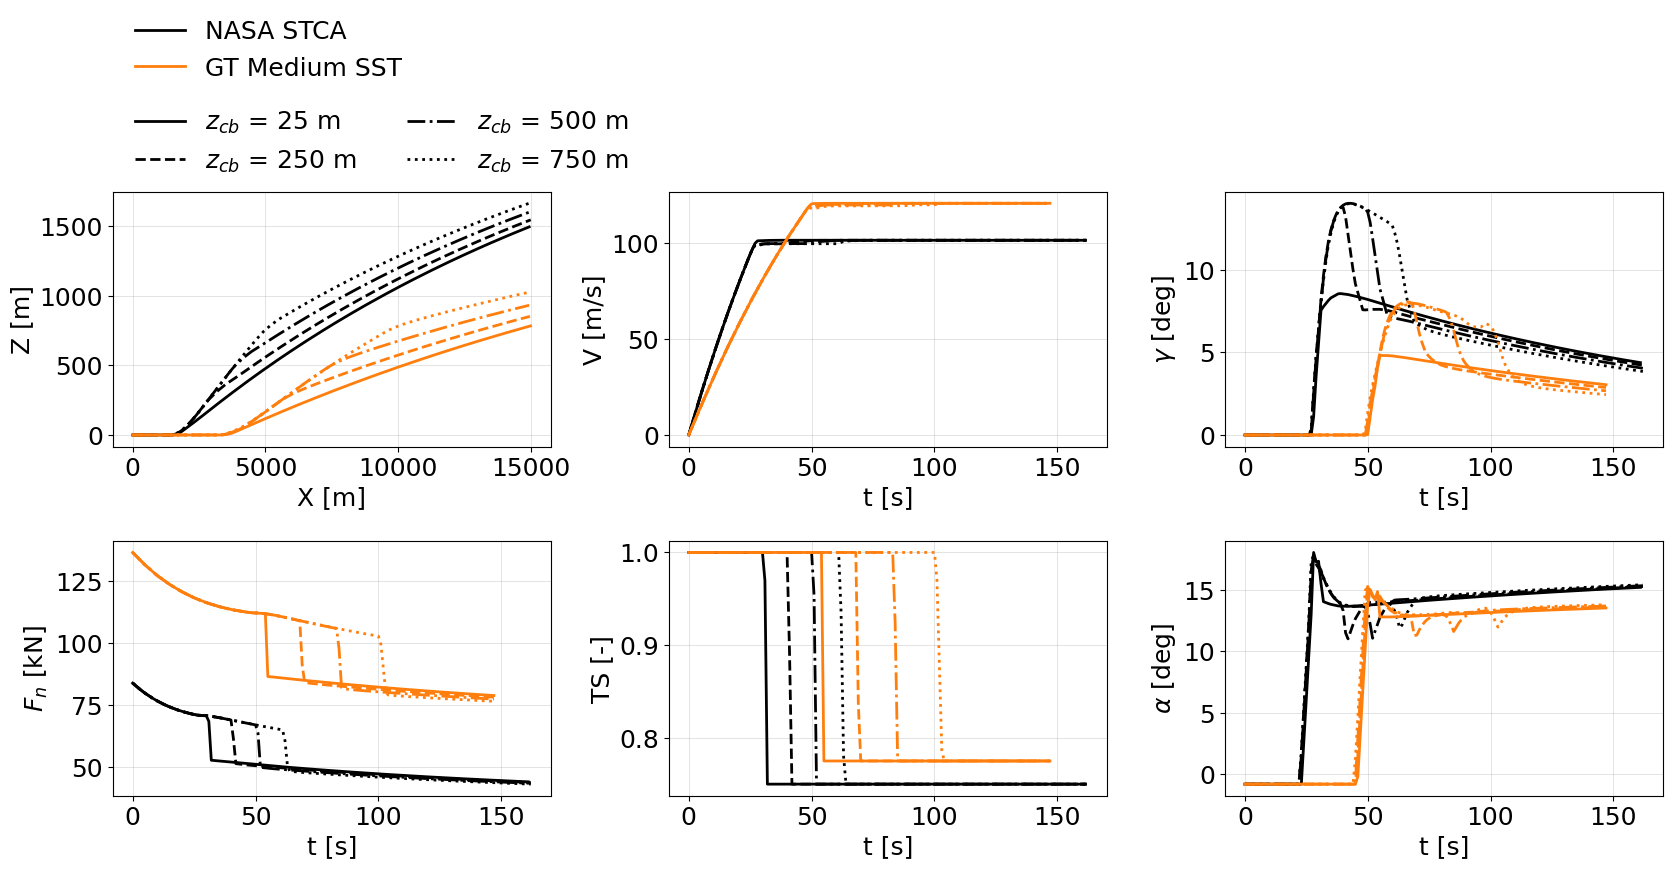

In [11]:
# Plot trajectories 
fig, ax = plt.subplots(2, 3, figsize=(20,8))
plt.style.use('../utils/plot.mplstyle')

for ac_name in ['stca', 'a10']:

    case = 'V2'

    for i, z_cb in enumerate([25., 250., 500., 750.]):
        for j,TS in enumerate([TS_cb_lst[ac_name][case][0]]):

            if ac_name == 'stca':
                rnd = 2
                color = 'k'
                label='NASA STCA'
            elif ac_name == 'a10':
                rnd = 3
                color='tab:orange'
                label='GT Medium SST'
            
            output_file_name = ac_name + '_' + str(np.round(z_cb, rnd)) + '_' + str(np.round(TS, rnd)) + '.sql'
            engine_file_name = 'engine_' + ac_name + '_' + str(np.round(z_cb, rnd)) + '_' + str(np.round(TS, rnd)) + '.csv'
            trajectory_file_name = 'trajectory_' + ac_name + '_' + str(np.round(z_cb, rnd)) + '_' + str(np.round(TS, rnd)) + '.csv'

            data = pd.read_csv('../cases/'+ac_name+'/trajectory/STCB/'+case+'/'+trajectory_file_name)
            
            if z_cb == 25:
                linestyle = '-'
                label_v = '$z_{cb}$ = 25 m'
            if z_cb == 250:
                linestyle = '--'
                label_v = '$z_{cb}$ = 250 m'
            if z_cb == 500:
                linestyle = '-.'
                label_v = '$z_{cb}$ = 500 m'
            if z_cb == 750:
                linestyle = ':'
                label_v = '$z_{cb}$ = 750 m'
            
            if z_cb == 25.:
                ax[0, 0].plot(data['X [m]'], data['Z [m]'], linestyle=linestyle, color=color, label=label)
            else:
                ax[0, 0].plot(data['X [m]'], data['Z [m]'], linestyle=linestyle, color=color)

            if ac_name == 'stca':
                ax[0, 1].plot(data['t_source [s]'], data['V [m/s]'], linestyle, color=color, label=label_v)
            else:
                ax[0, 1].plot(data['t_source [s]'], data['V [m/s]'], linestyle, color=color)
            ax[0, 2].plot(data['t_source [s]'], data['gamma [deg]'], linestyle, color=color)
            ax[1, 0].plot(data['t_source [s]'], data['F_n [N]']/1000., linestyle, color=color)
            ax[1, 1].plot(data['t_source [s]'], data['TS [-]'], linestyle, color=color)
            ax[1, 2].plot(data['t_source [s]'], data['alpha [deg]'], linestyle, color=color)

#             print(data['F_n [N]'][0])

ax[0, 0].set_xlabel('X [m]')
ax[0, 1].set_xlabel('t [s]')
ax[0, 2].set_xlabel('t [s]')
ax[1, 0].set_xlabel('t [s]')
ax[1, 1].set_xlabel('t [s]')
ax[1, 2].set_xlabel('t [s]')

ax[0, 0].set_ylabel('Z [m]')
ax[0, 1].set_ylabel('V [m/s]')
ax[0, 2].set_ylabel(r'$\gamma$ [deg]')
ax[1, 0].set_ylabel(r'$F_n$ [kN]')
ax[1, 1].set_ylabel('TS [-]')
ax[1, 2].set_ylabel(r'$\alpha$ [deg]')

ax[0,0].legend(loc='lower left', bbox_to_anchor=(0, 1.35), ncol=1, frameon=False)
ax[0,1].legend(loc='lower left', bbox_to_anchor=(-1.27, 0.98), ncol=2, frameon=False)
plt.subplots_adjust(hspace=0.37, wspace=0.27)


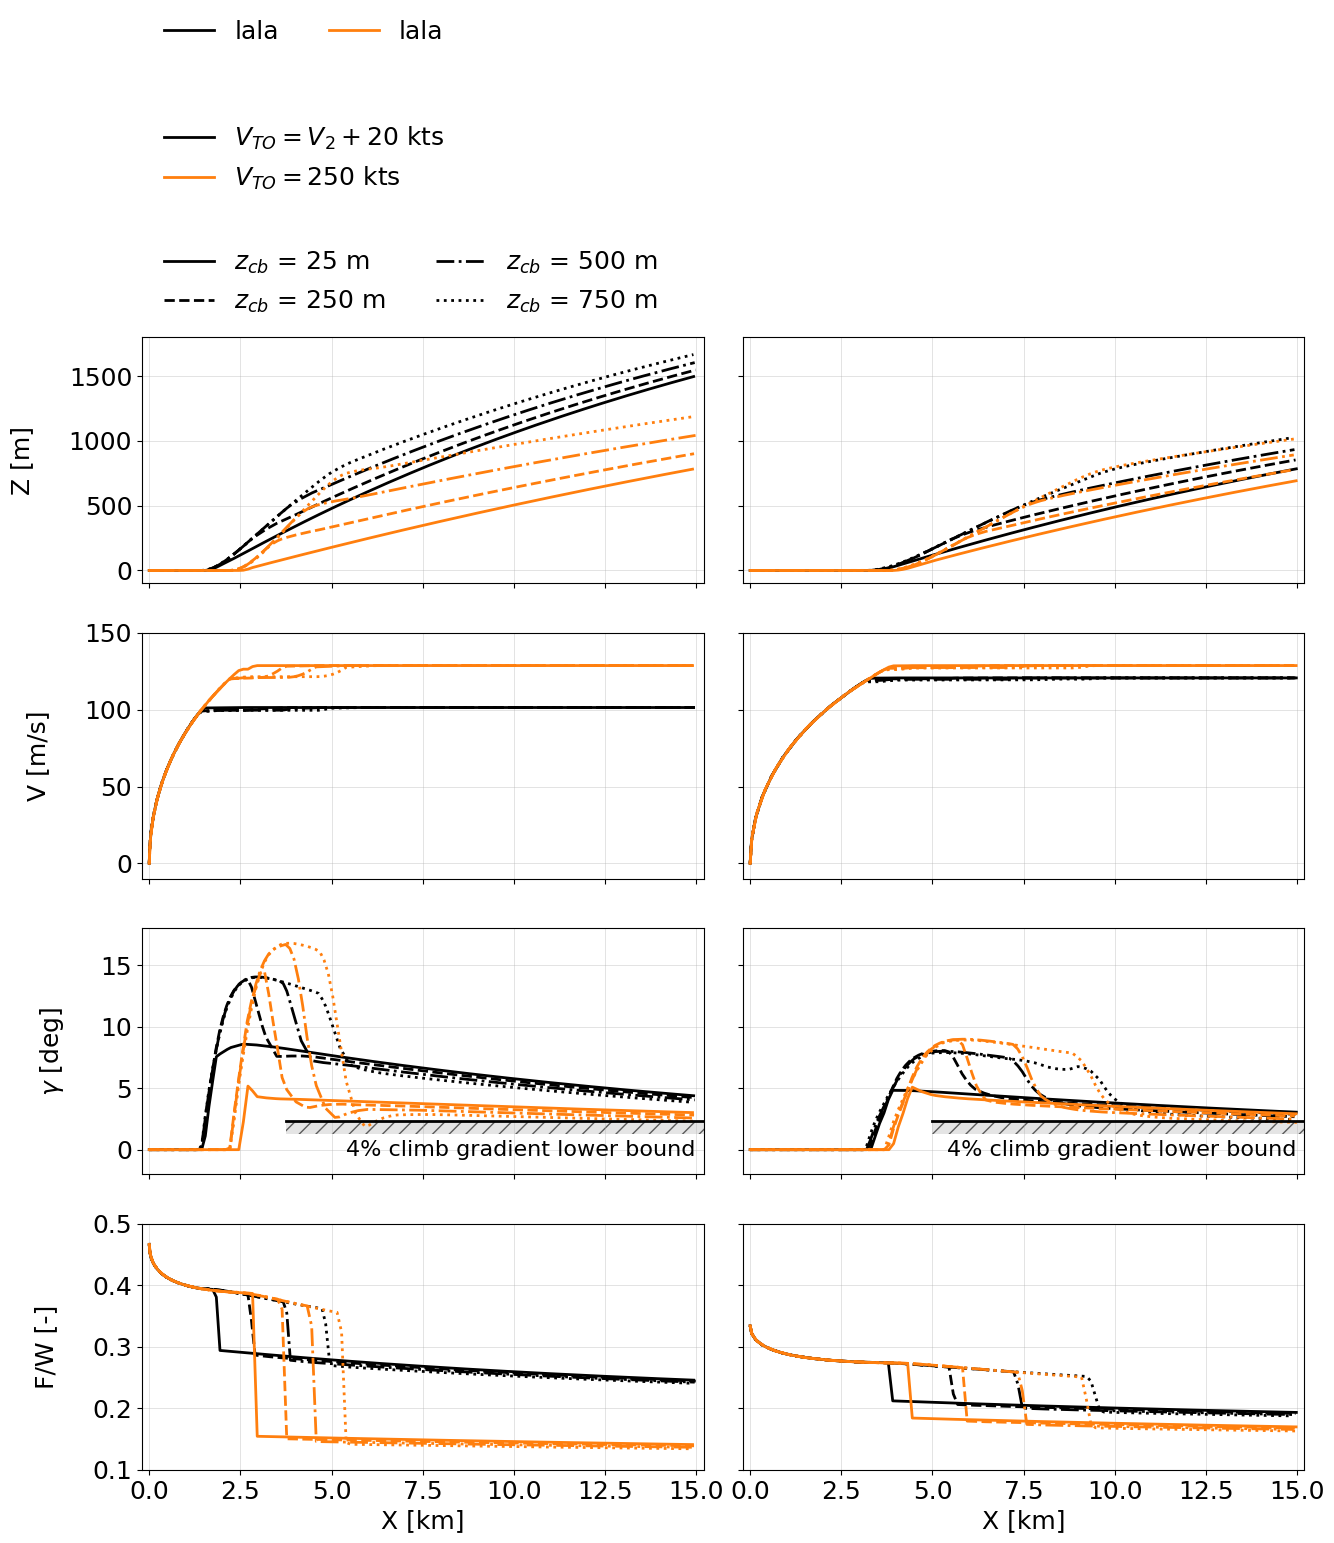

In [185]:
# Plot trajectories 
fig, ax = plt.subplots(4, 2, figsize=(15,15))
plt.style.use('../utils/plot.mplstyle')

for i,ac_name in enumerate(['stca', 'a10']):

    for j, case in enumerate(['V2', 'Vmax']):

        for k, z_cb in enumerate([25., 250., 500., 750.]):

            TS = TS_cb_lst[ac_name][case][0]

            data = pd.read_csv('../cases/'+ac_name+'/trajectory/STCB/'+case+'/'+'trajectory_' + ac_name + '_' + str(np.round(z_cb, rnd)) + '_' + str(np.round(TS, rnd)) + '.csv')
            
            
            if case == 'V2':
                color='k'
                label=r'$V_{TO}=V_{2}+20$ kts'
            elif case == 'Vmax':
                color='tab:orange'
                label=r'$V_{TO}=250$ kts'
            
            if z_cb == 25:
                linestyle = '-'
                label_v = '$z_{cb}$ = 25 m'
            if z_cb == 250:
                linestyle = '--'
                label_v = '$z_{cb}$ = 250 m'
            if z_cb == 500:
                linestyle = '-.'
                label_v = '$z_{cb}$ = 500 m'
            if z_cb == 750:
                linestyle = ':'
                label_v = '$z_{cb}$ = 750 m'
            
            if ac_name == 'stca':
                mtow = 55000*9.80665
                n_eng = 3
                x_limit = 3.75
            elif ac_name == 'a10':
                mtow = 166500*9.80665
                n_eng = 4
                x_limit = 5

            if case == 'V2':
                ax[0,i].plot(data['X [m]']/1000, data['Z [m]'], linestyle=linestyle, color=color, label=label_v)
            else:
                ax[0,i].plot(data['X [m]']/1000, data['Z [m]'], linestyle=linestyle, color=color)
            
            if z_cb == 25.0:
                ax[1,i].plot(data['X [m]']/1000, data['V [m/s]'], linestyle=linestyle, color=color, label=label)
            else:
                ax[1,i].plot(data['X [m]']/1000, data['V [m/s]'], linestyle=linestyle, color=color)
            
            if z_cb == 25.0:
                ax[2,i].plot(data['X [m]']/1000, data['gamma [deg]'], linestyle=linestyle, color=color, label='lala')
            else:
                ax[2,i].plot(data['X [m]']/1000, data['gamma [deg]'], linestyle=linestyle, color=color)
                
            ax[3,i].plot(data['X [m]']/1000, n_eng*data['F_n [N]']/mtow, linestyle=linestyle, color=color)
            
    ax[0,i].set_xticklabels([])
    ax[1,i].set_xticklabels([])
    ax[2,i].set_xticklabels([])

    ax[0,i].set_ylim([-100, 1800])
    ax[0,i].set_yticks([0, 500, 1000, 1500])
    ax[1,i].set_ylim([-10, 150])
    ax[1,i].set_yticks([0, 50, 100, 150])
    ax[2,i].set_ylim([-2, 18])
    ax[2,i].set_yticks([0, 5, 10, 15])
    ax[3,i].set_ylim([0.1, 0.5])
    
    ax[0,i].set_xlim([-0.2, 15.2])
    ax[1,i].set_xlim([-0.2, 15.2])
    ax[2,i].set_xlim([-0.2, 15.2])
    ax[3,i].set_xlim([-0.2, 15.2])
    
    ax[2,i].plot([x_limit,15.2], [180/np.pi*np.arctan(0.04), 180/np.pi*np.arctan(0.04)], 'k')
    ax[2,i].fill_between([x_limit, 15.2], [180/np.pi*np.arctan(0.04)-1, 180/np.pi*np.arctan(0.04)-1], [180/np.pi*np.arctan(0.04), 180/np.pi*np.arctan(0.04)], linewidth=0.0, facecolor='lightgrey', edgecolor='k', hatch='//', alpha=0.6)

    ax[2,i].annotate(s='4% climb gradient lower bound', xy=(5.4,-0.5), fontsize=16)
            
ax[0,0].set_ylabel('Z [m]', labelpad=25)
ax[1,0].set_ylabel('V [m/s]', labelpad=25)
ax[2,0].set_ylabel(r'$\gamma$ [deg]', labelpad=25)
ax[3,0].set_ylabel('F/W [-]', labelpad=25)
ax[3,0].set_xlabel('X [km]')
ax[3,1].set_xlabel('X [km]')

ax[0,1].set_yticklabels([])
ax[1,1].set_yticklabels([])
ax[2,1].set_yticklabels([])
ax[3,1].set_yticklabels([])

ax[0,0].legend(loc='lower left', ncol=2, bbox_to_anchor=(0, 1.), frameon=False)
ax[2,0].legend(loc='lower left', ncol=2, bbox_to_anchor=(0, 4.5), frameon=False)
ax[1,0].legend(loc='lower left', ncol=1, bbox_to_anchor=(0, 2.7), frameon=False)

plt.subplots_adjust(wspace=0.07)


In [49]:
k_rot = dict()
LD = dict()
x_to = dict()

for ac_name in ['stca', 'a10']:
    k_rot[ac_name] = dict()
    LD[ac_name] = dict()
    x_to[ac_name] = dict()
    
    for case in ['V2', 'Vmax']:
        k_rot[ac_name][case] = np.load('../cases/'+ac_name+'/output/STCB/'+case+'/sweeps/k_rot.npy')
        
        
        print(ac_name, ' ', case)
        print('k_rot:', np.mean(k_rot[ac_name][case]))
        
        LD[ac_name][case] = np.load('../cases/'+ac_name+'/output/STCB/'+case+'/sweeps/LD_climbout.npy')
        
        print('L/D: ', np.mean(LD[ac_name][case]))
        
        x_to[ac_name][case] = np.load('../cases/'+ac_name+'/output/STCB/'+case+'/sweeps/x_to.npy')
        
        print('x_to: ', np.mean(x_to[ac_name][case]))
        
        print('\n')

stca   V2
k_rot: 1.2424494002929674
L/D:  8.276393793032316
x_to:  1737.2122718299645


stca   Vmax
k_rot: 1.6567245189534603
L/D:  13.087513012117878
x_to:  2732.102892475288


a10   V2
k_rot: 1.4274519645451158
L/D:  8.529790679441978
x_to:  3695.769691068486


a10   Vmax
k_rot: 1.537217113644657
L/D:  10.929486536820598
x_to:  4246.15971643662




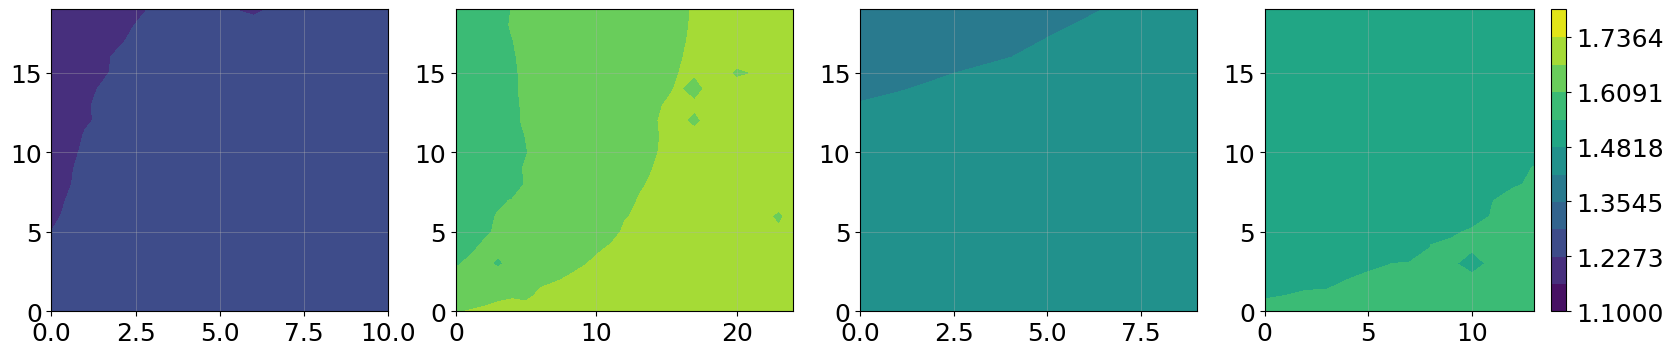

In [20]:
fig, ax = plt.subplots(1,4, figsize=(20,4))

levels=np.linspace(1.1, 1.8, 12)

ax[0].contourf(k_rot['stca']['V2'], levels=levels)
ax[1].contourf(k_rot['stca']['Vmax'], levels=levels)
ax[2].contourf(k_rot['a10']['V2'], levels=levels)
c3 = ax[3].contourf(k_rot['a10']['Vmax'], levels=levels)
plt.colorbar(c3, ax=ax[3])

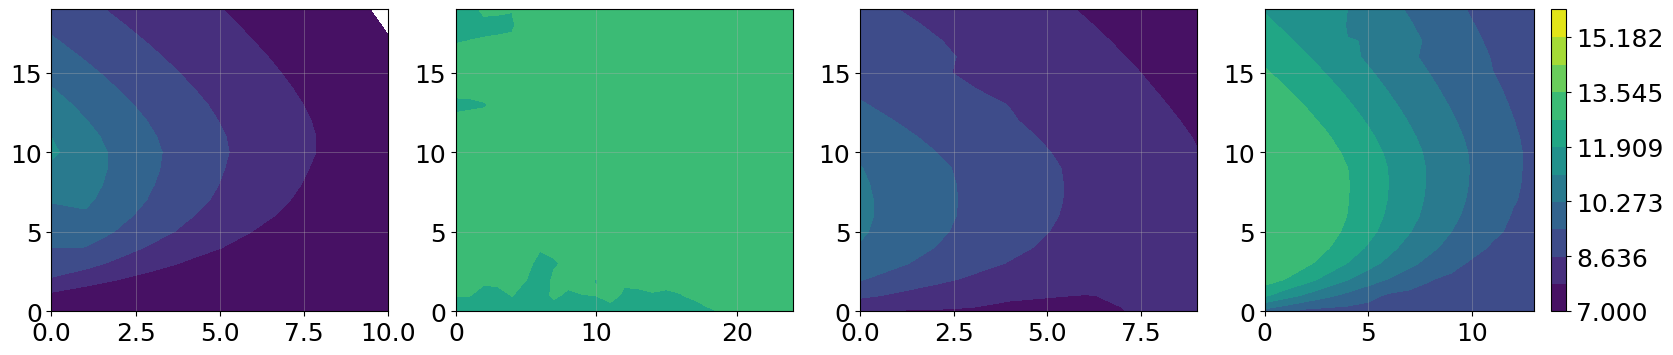

In [27]:
fig, ax = plt.subplots(1,4, figsize=(20,4))

levels=np.linspace(7, 16, 12)

ax[0].contourf(LD['stca']['V2'], levels=levels)
ax[1].contourf(LD['stca']['Vmax'], levels=levels)
ax[2].contourf(LD['a10']['V2'], levels=levels)
c3 = ax[3].contourf(LD['a10']['Vmax'], levels=levels)
plt.colorbar(c3, ax=ax[3])

In [45]:
x_to = dict()

for ac_name in ['stca', 'a10']:
    x_to[ac_name] = dict()

    for case in ['V2', 'Vmax']:

        x_to[ac_name][case] = np.zeros((np.size(z_cb_lst), np.size(TS_cb_lst[ac_name][case])))
        
        for i, z_cb in enumerate(z_cb_lst):
            for j, TS in enumerate(TS_cb_lst[ac_name][case]):
             
                results = pd.read_csv('../cases/'+ac_name+'/trajectory/STCB/'+case+'/trajectory_'+ac_name+'_'+str(np.round(z_cb, 3))+'_'+str(np.round(TS,3))+'.csv')
        
                x_to[ac_name][case][i,j] = results['X [m]'][np.where(results['Z [m]'] > 35*0.3048)[0][0]]
        

        # np.save('../cases/'+ac_name+'/output/STCB/'+case+'/sweeps/x_to.npy', x_to[ac_name][case])
        